Our goal is to predict the probability of Rainfall based on the features at hand. The dataset is ordered by date, in an ascending order. 

The dataset has been obtained from the Australian Bureau of Meteorology. We have added an extra column to the existing dataset called 'Rain Tomorrow'. Below are the links to the dataset;

https://www.kaggle.com/filhypedeeplearning/2020-sydney-daily-weather-observations

http://www.bom.gov.au/climate/data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from sklearn.model_selection import train_test_split

In [4]:
path = r'C:\Users\Geo\Downloads\2020 Sydney Daily Weather Observations'
files = glob.iglob(os.path.join(path, "*.csv")) 

df = pd.concat((pd.read_csv(file, index_col='Date', parse_dates=True, 
                            dayfirst=True, encoding='cp1250') for file in files)) 

Overview of the dataset.

In [5]:
df.head(3)

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Rain Tomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,18.9,27.3,0.0,14.2,4.5,SSW,39.0,23:28,20.9,68.0,...,S,11,1015.0,24.9,60.0,5.0,ESE,24,1013.5,0.0
2020-01-02,19.3,29.0,0.0,7.2,5.3,SSW,35.0,23:02,22.6,64.0,...,ESE,17,1019.8,27.2,51.0,7.0,ESE,20,1017.4,0.0
2020-01-03,21.9,29.4,0.0,NaN,8.2,NE,43.0,16:22,24.1,79.0,...,WNW,9,1017.5,27.6,68.0,0.0,E,26,1012.5,0.0


The dataframe contains **366** rows, the total number of days in 2020 (leap year), and **21** distinct columns (excluding the 'Date' column). The 'Rain Tomorrow' column has been manually added in order to be used in our analysis.

In [6]:
print(df.shape)

(366, 21)


Let's have a look at the descriptive statistics of this dataframe. 

In [7]:
df.describe()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa),Rain Tomorrow
count,366.000000,364.000000,362.000000,356.000000,362.000000,365.000000,366.000000,365.000000,365.000000,366.000000,364.000000,364.000000,365.000000,366.000000,366.000000,365.000000
mean,14.670219,23.510714,4.285083,5.382865,6.525414,42.663014,17.531421,77.649315,4.526027,1018.417760,21.991758,60.728022,4.616438,19.598361,1016.027869,0.438356
std,4.354354,4.786657,13.519783,3.317315,4.020979,14.720617,4.456772,15.420757,2.812356,7.478648,4.737866,17.664775,2.689163,7.990741,7.517114,0.496867
min,6.200000,13.600000,0.000000,0.000000,0.000000,17.000000,8.100000,36.000000,0.000000,997.400000,10.500000,19.000000,0.000000,2.000000,992.200000,0.000000
25%,10.900000,19.700000,0.000000,3.000000,2.800000,31.000000,13.800000,67.000000,1.000000,1013.450000,18.600000,50.000000,2.000000,15.000000,1010.650000,0.000000
50%,14.800000,23.400000,0.000000,4.800000,7.600000,41.000000,17.950000,80.000000,6.000000,1018.650000,21.900000,60.500000,6.000000,19.000000,1016.500000,0.000000
75%,18.275000,26.500000,2.550000,7.200000,9.900000,50.000000,21.000000,90.000000,7.000000,1023.850000,24.900000,71.000000,7.000000,24.000000,1021.675000,1.000000
max,25.300000,41.200000,164.800000,25.400000,13.400000,106.000000,31.200000,100.000000,8.000000,1038.300000,40.800000,100.000000,8.000000,59.000000,1035.100000,1.000000


We can see on the above table that on average there were 6.5 hours of sunshine in Sydney across the whole year. It is also obvious that there are a few NAs in most of the dataset's columns. We can see the total number of missing values of each column below. To proceed we need to find an appropriate way to handle the missing data. Since the dataset is small, it is preferable to not remove the NAs but rather impute them.

In [8]:
df.isna().sum()

Minimum temperature (°C)              0
Maximum temperature (°C)              2
Rainfall (mm)                         4
Evaporation (mm)                     10
Sunshine (hours)                      4
Direction of maximum wind gust        1
Speed of maximum wind gust (km/h)     1
Time of maximum wind gust             1
9am Temperature (°C)                  0
9am relative humidity (%)             1
9am cloud amount (oktas)              1
9am wind direction                    0
9am wind speed (km/h)                 0
9am MSL pressure (hPa)                0
3pm Temperature (°C)                  2
3pm relative humidity (%)             2
3pm cloud amount (oktas)              1
3pm wind direction                    0
3pm wind speed (km/h)                 0
3pm MSL pressure (hPa)                0
Rain Tomorrow                         1
dtype: int64

By using 'ffill' we are carrying the last observation forward thus replacing the NA value with it.

In [9]:
df = df.fillna(method='ffill')

## EDA

We can make some interesting observations by looking at the fluctuation of both the Maximum and Minimum temperatures across the whole year. It is noticable that they follow a similar trend.

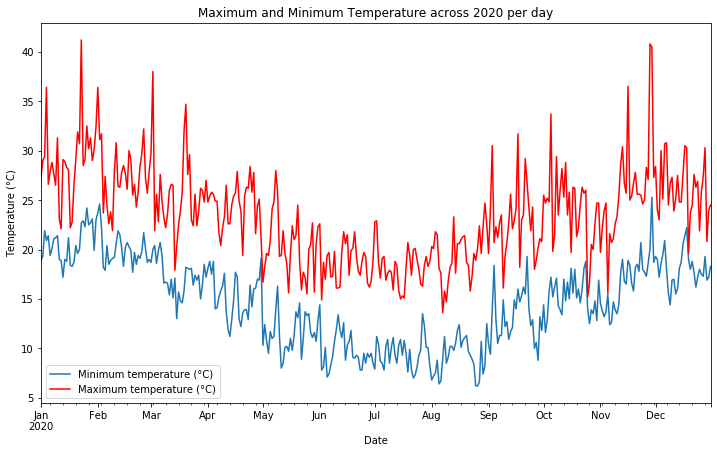

In [10]:
df['Minimum temperature (°C)'].plot(figsize=(12,7), legend=True)
df['Maximum temperature (°C)'].plot(figsize=(12,7), color='r', legend=True)
plt.title('Maximum and Minimum Temperature across 2020 per day')
plt.ylabel('Temperature (°C)')
plt.show()

There is indeed a positive correlation between these two features.

In [11]:
print(df['Maximum temperature (°C)'].corr(df['Minimum temperature (°C)']))

0.7529303877734146


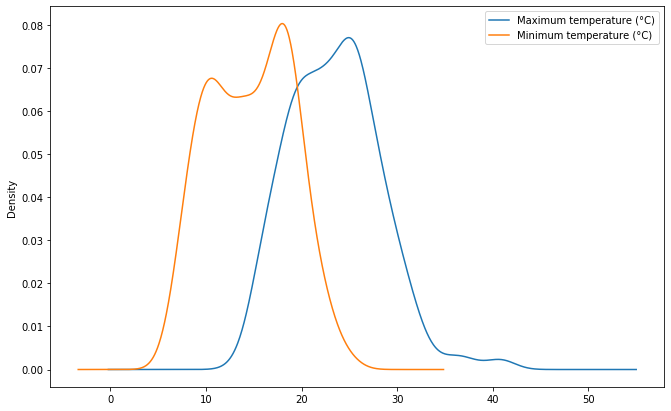

In [12]:
df['Maximum temperature (°C)'].plot(kind='kde', figsize=(11, 7), legend=True)
df['Minimum temperature (°C)'].plot(kind='kde', figsize=(11, 7), legend=True)
plt.show()

We can visualize how many days it rained in the city in 2020. To begin with, we define a function to calculate the number of days it rained. We find that there was rainfall in **162** days, while there wasn't any in the remaining **204**.

In [13]:
def rain(col):
    rained, not_rained = 0, 0
    for i in col:
        if i!=0:
            rained+=1
        else:
            not_rained+=1
    return rained, not_rained

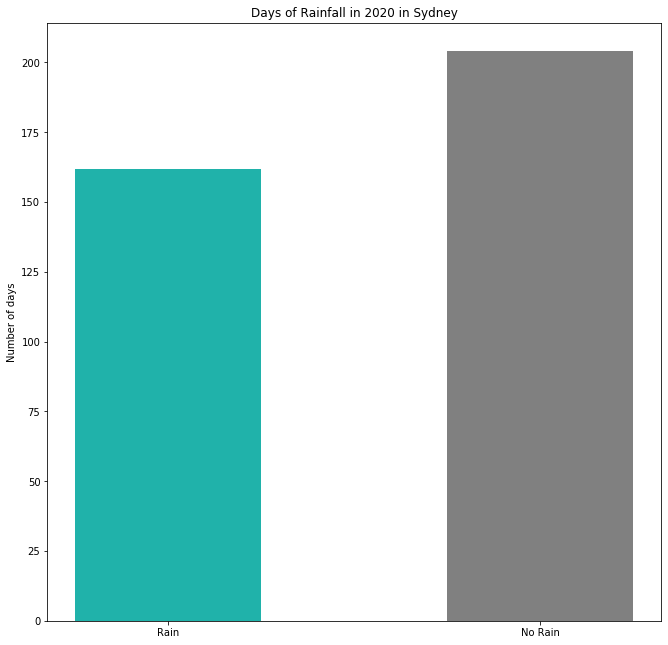

In [14]:
number_rain_days = [rain(df['Rainfall (mm)'])[0], rain(df['Rainfall (mm)'])[1]]

plt.figure(figsize=(11,11))
plt.bar(np.arange(0,2), number_rain_days, width=0.5, tick_label=('Rain', 'No Rain'),
        color=['lightseagreen','gray'])
plt.title('Days of Rainfall in 2020 in Sydney')
plt.ylabel('Number of days')
plt.show()

It would be interesting to see the months with the most sunshine on average.

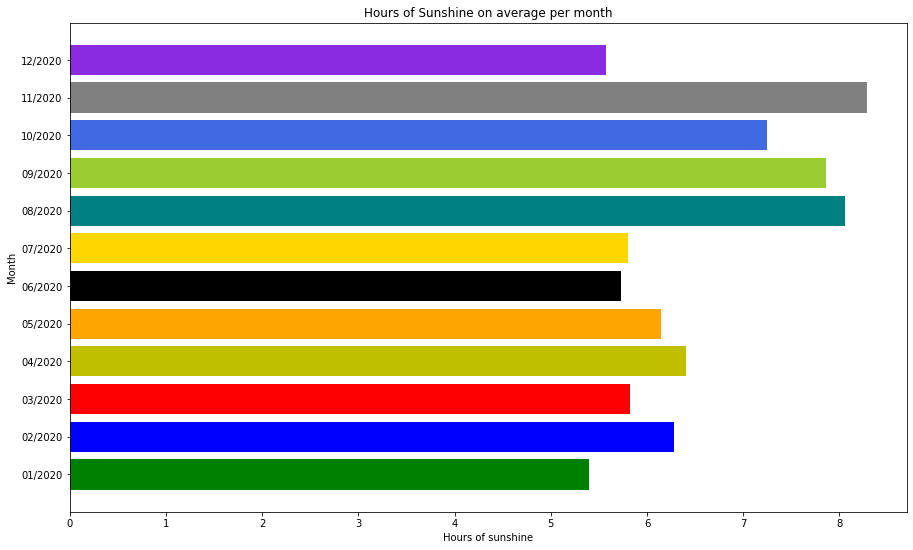

In [15]:
avg_sunshine_per_month = df['Sunshine (hours)'].groupby(pd.Grouper(freq="M")).mean() 
locs = np.array(np.arange(0,12))
months = np.unique(df.index.strftime('%m/%Y').tolist())
colormap = np.array(['g', 'b', 'r', 'y', 'orange', 'black', 'gold', 'teal', 
                     'yellowgreen', 'royalblue', 'gray', 'blueviolet'])

plt.figure(figsize=(15, 9))
plt.barh(months, avg_sunshine_per_month, color=colormap[locs])
plt.title('Hours of Sunshine on average per month')
plt.xlabel('Hours of sunshine')
plt.ylabel('Month')
plt.show()

The months that the most hours of sunshine in 2020 were observed are between August and November.

## Preprocessing

We have already cleaned the dataset but there is some more work to be done. Machine Learning models cannot discern non numeric data therefore we need to convert the those columns. We define a function below which counts the number of columns that contain non-numeric values.

In [16]:
def count_str_columns(dataframe):
    count = 0
    for y, z in enumerate(dataframe):
        if any(isinstance(i, str) for i in dataframe.iloc[:,y]):
            count+=1
    return count

In [17]:
count_str_columns(df)

5